In [79]:
%pip install matplotlib numpy torch torchvision tqdm
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

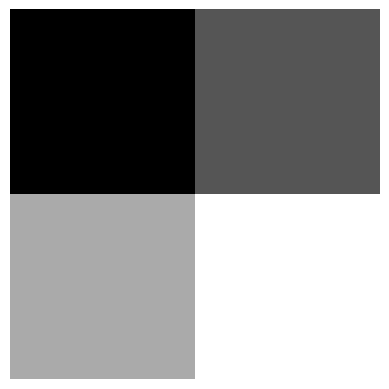

In [81]:
plt.imshow([[1, 2], [3, 4]], cmap='gray')
plt.axis('off')
plt.show()

In [82]:
x_sample, y_sample=mnist_trainset[0]

In [83]:
y_sample

5

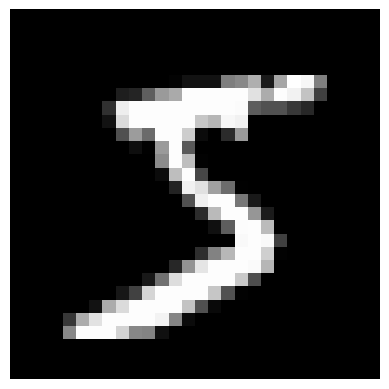

In [84]:
plt.imshow(x_sample, cmap='gray')
plt.axis('off')
plt.show()

In [85]:
torch.tensor(list(x_sample.getdata()), dtype=torch.float32)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

# Schritte
- Dataset bauen
- Modell bauen
- Loss-Funktion, Optimizer
 -Trainingsschleife

In [86]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds=ds  

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        # self.ds ist ein Dataset besteht aus Tupeln (x, y) wobei x jeweils ein PIL-Image ist
        x, y=self.ds[idx]
        y=torch.tensor(y)


        # get values of pil image x
        x=torch.tensor(list(x.getdata()), dtype=torch.float32)

        # Ziel: x: als Tensor mit 784 Elementen, y: als Tensor mit 1 Element
        return x, y
    
# dataset_sample=MyDataset(mnist_trainset)
# x, y=dataset_sample[0]
# print("x.shape:", x.shape)          # torch.Size([784])
# print("y:", y)                      # tensor(5)

# image=x.reshape(28, 28)
# plt.imshow(image, cmap='gray')
# plt.axis('off')
# plt.show()

In [87]:
# 1. Schritt: Modell definieren
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=torch.nn.Linear(784, 10)
    
    def forward(self, x):
        return self.l1(x)

# 2. Schritt: Modell instanziieren

model=MyModel()

# 3. Schritt: Optimierer definieren
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

# 4. Schritt: X und y in DataLoader verpacken
data = MyDataset(mnist_trainset)

data_loader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True)


# 5. Schritt: Loss-Funktion definieren
loss_func=torch.nn.CrossEntropyLoss()

# 6. Schritt: Training
n_epochs=10
for epoch in range(n_epochs):
    for x, y in data_loader:
        optimizer.zero_grad()
        y_hat=model(x)
        loss=loss_func(y_hat, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{n_epochs} wurde abgeschlossen")

Epoch 1/10 wurde abgeschlossen
Epoch 2/10 wurde abgeschlossen
Epoch 3/10 wurde abgeschlossen
Epoch 4/10 wurde abgeschlossen
Epoch 5/10 wurde abgeschlossen
Epoch 6/10 wurde abgeschlossen
Epoch 7/10 wurde abgeschlossen
Epoch 8/10 wurde abgeschlossen
Epoch 9/10 wurde abgeschlossen
Epoch 10/10 wurde abgeschlossen


In [88]:
# 7. Schritt: Testen
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
test_data = MyDataset(mnist_testset)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

n_correct=0
n_total=0
for x, y in test_loader:
    y_hat=model(x)
    n_correct+=(y_hat.argmax(dim=1)==y).sum().item()
    n_total+=len(y)
print(f"Genauigkeit: {n_correct/n_total:.4f}")

Genauigkeit: 0.8959


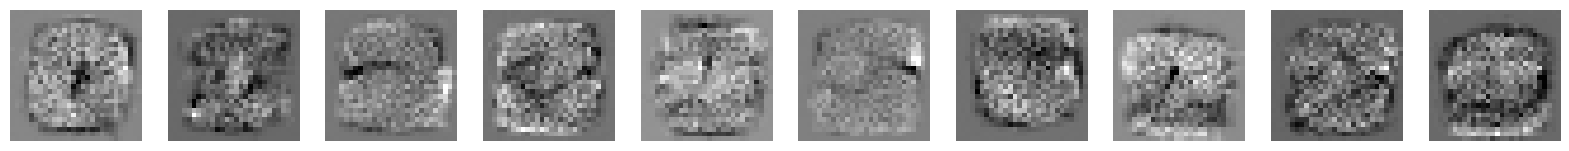

In [89]:
# 8. Schritt: Modell plotten
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(model.l1.weight[i].detach().numpy().reshape(28, 28), cmap='gray')
    ax[i].axis('off')
plt.show()